In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)
from keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv("timeseries_salesdata.csv")
data.set_index("Date", inplace =True)
valid = pd.read_csv(r'dec.csv')

In [3]:
validate = data['Sales'].tail(96)
validate = validate.values
test_set = pd.DataFrame(data['Sales'].tail(93))

In [4]:
train = data["Sales"].iloc[:-96]
uni_data= train

In [5]:
uni_data = uni_data.values
len(uni_data)

900

In [6]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [7]:
#CNN Model

# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
# define input sequence



# define input sequence
raw_seq = uni_data
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [8]:
def split_sequence2(sequence2, n_steps2):
    X2, y2 = list(), list()
    for i in range(len(sequence2)):
        # find the end of this pattern
        end_ix2 = i + n_steps2
        # check if we are beyond the sequence
        if end_ix2 > len(sequence2)-1:
            break
        # gather input and output parts of the pattern
        seq_x2, seq_y2 = sequence2[i:end_ix2], sequence2[end_ix2]
        X2.append(seq_x2)
        y2.append(seq_y2)
    return array(X2), array(y2)

# define input sequence
raw_seq2 = validate
# choose a number of time steps
n_steps2 = 3
# split into samples
X2, y2 = split_sequence(raw_seq2, n_steps2)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features2 = 1
X2 = X2.reshape((X2.shape[0], X2.shape[1], n_features2))


In [9]:
print(X.shape)
print(y.shape)
print(X2.shape)
print(y2.shape)

(897, 3, 1)
(897,)
(93, 3, 1)
(93,)


In [10]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [11]:
# fit model
history=model.fit(X, y, epochs=100,  batch_size=30, verbose=1, validation_data=(X2,y2),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)


Epoch 1/100
30/30 [==============================] - 45s 59ms/step - loss: 11851774.7742 - val_loss: 22438186.0000
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 3592129.2984 - val_loss: 22635028.0000
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 3307726.0323 - val_loss: 22317066.0000
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 3189799.8347 - val_loss: 21795546.0000
Epoch 5/100
30/30 [==============================] - 0s 16ms/step - loss: 3060408.1089 - val_loss: 21438446.0000
Epoch 6/100
30/30 [==============================] - 0s 11ms/step - loss: 2953910.3589 - val_loss: 21141326.0000
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 2860399.5645 - val_loss: 20797602.0000
Epoch 8/100
30/30 [==============================] - 0s 10ms/step - loss: 2785650.0363 - val_loss: 20524912.0000
Epoch 9/100
30/30 [==============================] - 1s 18ms/step - loss: 2735431.5766 - val_loss

In [12]:
# demonstrate prediction
#x_input = array([70, 80, 90])
#x_input = x_input.reshape((1, n_steps, n_features))
#ypred = model.predict(x_input, verbose=0)
#print(yhat)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3250      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
_________________________________________________________________


In [14]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('CNN model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

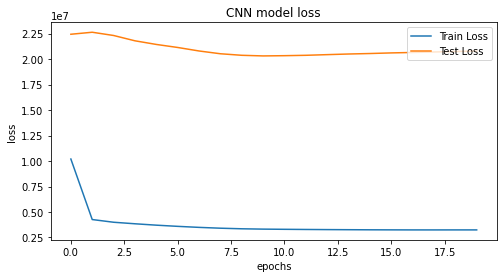

In [15]:
train_score = model.evaluate(X, y, verbose=0)
#print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
#% (np.sqrt(train_score[1]), train_score[2]))
#test_score = model.evaluate(X_test, test_set, verbose=0)
#print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
#% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)

In [16]:
len(model.predict(X2))

93

In [17]:
pred = model.predict(X2)
len(pred)
forecnn= pd.DataFrame(pred)
forecnn.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_CNNforecasts_dataframe.csv",index = False,header=True)

In [18]:
actual_fore=test_set.rename(columns={"Sales":"Actual Sales"})
actual_fore["cnn"]=forecnn.values
cnn=actual_fore
cnn

,Actual Sales,cnn
Date,,
30-Sep-20,6561.50,5201.246582
1-Oct-20,4599.50,4452.854980
2-Oct-20,4983.00,4216.494141
3-Oct-20,16826.00,4079.109863
4-Oct-20,28484.00,8845.626953
...,...,...
27-Dec-20,3116.25,2538.829346
28-Dec-20,7736.05,2306.722168
29-Dec-20,6981.61,4759.245117


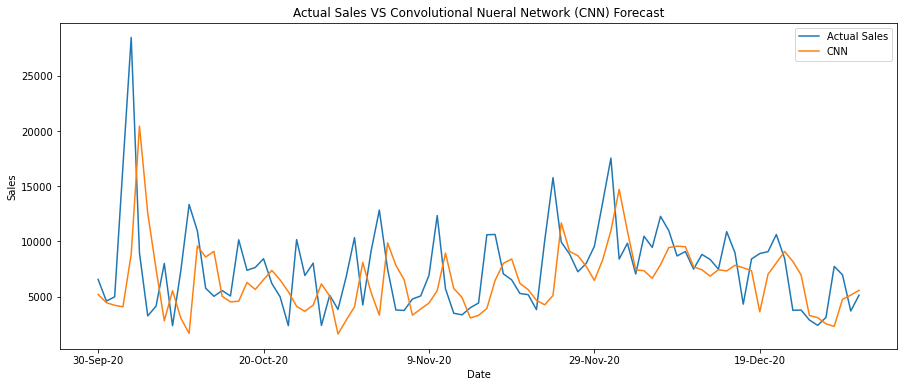

In [19]:
from matplotlib import pyplot
cnn['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
cnn['cnn'].plot(figsize=(15,6), label = "CNN")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Convolutional Nueral Network (CNN) Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [20]:
y_true1 = cnn["Actual Sales"].dropna()
y_pred1 = cnn["cnn"].dropna()

In [21]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
print(timeseries_evaluation_metrics_func(y_true1, y_pred1))

Evaluation metric results:-
MSE is : 20782671.207540046
MAE is : 3215.0403926726303
RMSE is : 4558.801509995807
MAPE is : 44.482970009016505
R2 is : -0.3640285720190477

None
